# Seção 4: Classificação Binária (usando MLP classifier)- breast cancer
Os dados utilizados neste notebook foram tirados da página [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

Esse notebook diferencia-se do anterior (4.01) pois esse usa o pacote MLP Classifier da biblioteca Sklearn.

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix

## Importação das bases

In [3]:
df_inputs = pd.read_csv("./99_bases/entradas_breast.csv")
df_outputs = pd.read_csv("./99_bases/saidas_breast.csv")

print(f"""- Formato do dataframe df_inputs: {df_inputs.shape}
- Formato do dataframe df_outputs: {df_outputs.shape}""")

- Formato do dataframe df_inputs: (569, 30)
- Formato do dataframe df_outputs: (569, 1)


### Análise das bases importadas:

In [4]:
# df_description = pd.DataFrame()
# for feature in df_inputs.columns:
    

### Pre-processamento

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=.2)

print(f"""{X_train.shape} e {y_train.shape}
{X_test.shape} e {y_test.shape}""")

(455, 30) e (455, 1)
(114, 30) e (114, 1)


### Modelo

In [6]:
model = Sequential()

# Camada de entrada e intermediária
model.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30))

# Camada intermediária ou oculta
model.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))

# Camada de saída
model.add(Dense(units=1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.05)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=False);

In [7]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>.5,1,0)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        54
           1       0.77      1.00      0.87        60

    accuracy                           0.84       114
   macro avg       0.88      0.83      0.83       114
weighted avg       0.88      0.84      0.84       114

[[36 18]
 [ 0 60]]


## Pegando os pesos

In [8]:
pesos0 = model.layers[0].get_weights()
pesos0[:,]

[array([[-0.09090163,  0.06492862,  0.04865545,  0.10076027,  0.00721448,
         -0.2314021 , -0.13886613,  0.06165872,  0.3488461 ,  0.09849939,
          0.08983129,  0.04919771, -0.08431541,  0.15562612,  0.02311489,
          0.17089935],
        [-0.16346535, -0.03672048,  0.03062365, -0.01070545,  0.13795711,
          0.0211038 ,  0.02791181, -0.13328658,  0.35996577, -0.14220804,
         -0.029176  , -0.21588582,  0.08199998, -0.09740059, -0.13436615,
          0.07101137],
        [ 0.05127445,  0.04143243,  0.18511227,  0.09161936, -0.04862555,
         -0.1429234 , -0.10213716,  0.02375954,  0.20927523,  0.05188238,
          0.11760744, -0.10524945, -0.12620947,  0.08906788, -0.02588664,
          0.16809641],
        [-0.05200257,  0.07529589,  0.12789714,  0.00729704, -0.05348637,
          0.02122619, -0.00862603,  0.00515032,  0.04985984,  0.05983972,
          0.07419576,  0.11943019,  0.0091015 ,  0.08146503,  0.01389862,
          0.01547109],
        [ 0.2060459 

In [9]:
model_sklearn = MLPClassifier(hidden_layer_sizes=16, activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                              learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True,
                              random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                              early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                              n_iter_no_change=10, max_fun=15000)

model_sklearn.fit(X_train, y_train.values[:,0])

y_pred_sklearn = model_sklearn.predict_proba(X_test)
y_pred_sklearn = np.where(y_pred_sklearn[:,1]>.5,1,0)

In [10]:
print(classification_report(y_test, y_pred_sklearn))

print(confusion_matrix(y_test, y_pred_sklearn))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        54
           1       0.84      0.93      0.88        60

    accuracy                           0.87       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.87      0.87      0.87       114

[[43 11]
 [ 4 56]]


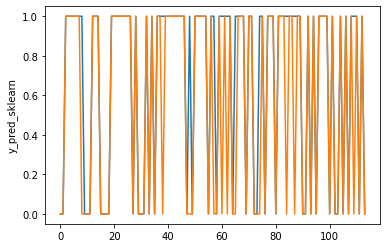

In [11]:
df_y_comparation = pd.DataFrame(data={"y_pred": y_pred[:,0].tolist(), "y_pred_sklearn":y_pred_sklearn.tolist()})

sns.lineplot(x=np.arange(len(df_y_comparation)), y=df_y_comparation["y_pred"])
sns.lineplot(x=np.arange(len(df_y_comparation)), y=df_y_comparation["y_pred_sklearn"]);